In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

num_epochs = 10
batch_size = 100
learning_rate = 0.001
losses = []

# 图像预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 转换为Tensor
    transforms.Normalize((0.5,), (0.5,))  # 归一化
])

# 加载FashionMNIST训练集
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 加载FashionMNIST测试集
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

# 在测试集上测试模型的准确率
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('测试集上的准确率: {}%'.format(100 * correct / total))


Epoch [1/10], Step [100/600], Loss: 0.5806
Epoch [1/10], Step [200/600], Loss: 0.4983
Epoch [1/10], Step [300/600], Loss: 0.4577
Epoch [1/10], Step [400/600], Loss: 0.4035
Epoch [1/10], Step [500/600], Loss: 0.4543
Epoch [1/10], Step [600/600], Loss: 0.3614
Epoch [2/10], Step [100/600], Loss: 0.3595
Epoch [2/10], Step [200/600], Loss: 0.4328
Epoch [2/10], Step [300/600], Loss: 0.3439
Epoch [2/10], Step [400/600], Loss: 0.4443
Epoch [2/10], Step [500/600], Loss: 0.2996
Epoch [2/10], Step [600/600], Loss: 0.3150
Epoch [3/10], Step [100/600], Loss: 0.3381
Epoch [3/10], Step [200/600], Loss: 0.4226
Epoch [3/10], Step [300/600], Loss: 0.2852
Epoch [3/10], Step [400/600], Loss: 0.3094
Epoch [3/10], Step [500/600], Loss: 0.3398
Epoch [3/10], Step [600/600], Loss: 0.3361
Epoch [4/10], Step [100/600], Loss: 0.3303
Epoch [4/10], Step [200/600], Loss: 0.3125
Epoch [4/10], Step [300/600], Loss: 0.1828
Epoch [4/10], Step [400/600], Loss: 0.2337
Epoch [4/10], Step [500/600], Loss: 0.3005
Epoch [4/10

测试集上的准确率: 88.04%


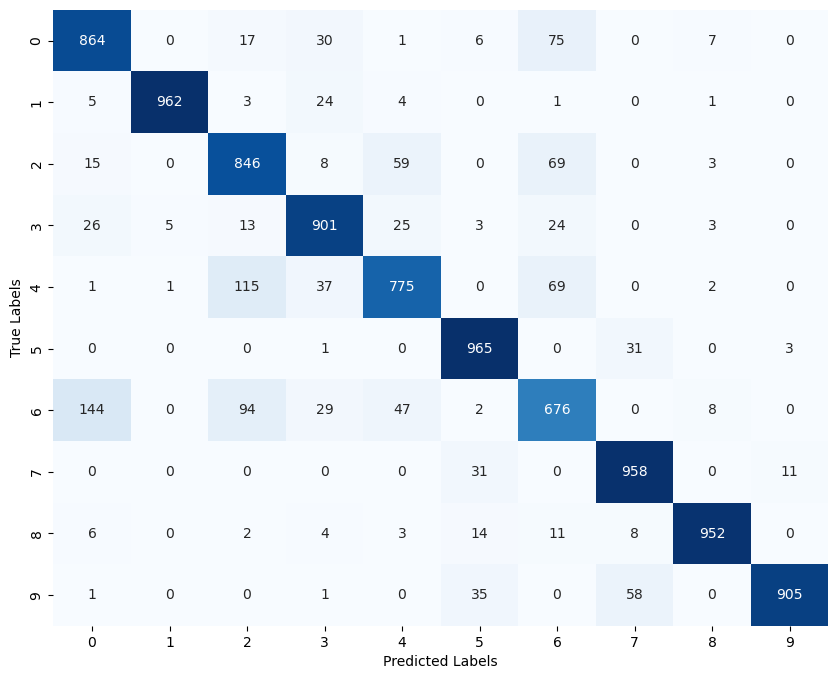

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ...

# 在测试集上测试模型的准确率和绘制混淆矩阵
with torch.no_grad():
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []

    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

    accuracy = 100 * correct / total
    print('测试集上的准确率: {}%'.format(accuracy))

    # 计算混淆矩阵
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

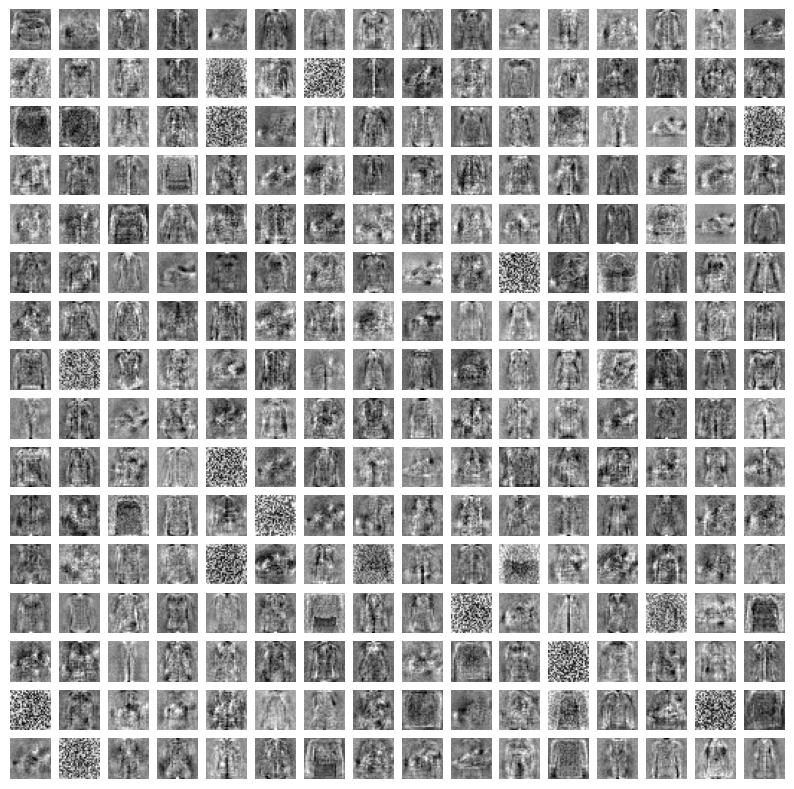

测试集上的准确率: 88.0%


In [21]:
import matplotlib.pyplot as plt

# ...

# 在测试集上测试模型的准确率
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 可视化模型分析图
        if total == batch_size:  # 仅可视化一个批次的图像
            features = model.fc1.weight.detach().cpu().numpy()  # 获取第一层全连接层的权重
            plt.figure(figsize=(10, 10))
            for i in range(features.shape[0]):
                plt.subplot(16, 16, i + 1)
                plt.imshow(features[i].reshape(28, 28), cmap='gray')
                plt.axis('off')
            plt.show()
            break

    print('测试集上的准确率: {}%'.format(100 * correct / total))


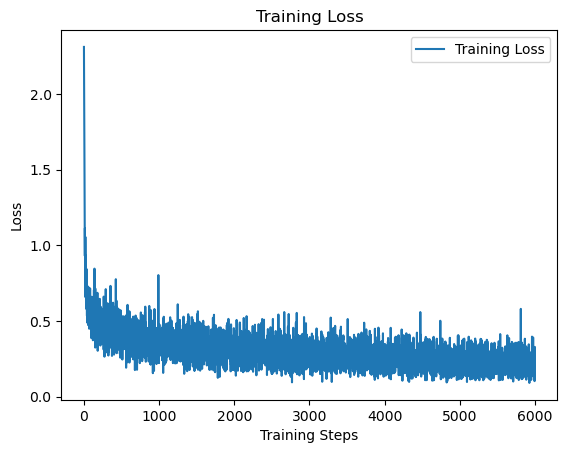

In [22]:
plt.plot(losses, label='Training Loss')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()